In [1]:
# Import libraries

# basic libraries
import pandas as pd
import numpy as np
import math

# data visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# import seaborn as sns

# working with SQL
import psycopg2
import sqlalchemy as sa
from   sqlalchemy.engine import URL
from   sqlalchemy import text

# working with time series
import matplotlib.dates as mdates
from datetime import date, time, datetime

# statistical computation
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

# make sure each time the random generation gives the same result
np.random.seed(1234)

In [2]:
constructor_results = pd.read_csv("data_raw\constructor_results.csv")
constructors = pd.read_csv("data_raw/constructors.csv")
races=pd.read_csv("data_raw/races.csv")
constructor_standings=pd.read_csv("data_raw/constructor_standings.csv")
results=pd.read_csv("data_raw/results.csv")

In [3]:

races_21=races.query("year >=2000")
#merge data
constructors_merged_1 = pd.merge(constructors,
                         constructor_results,
                         on = "constructorId",
                         how = "inner")

constructors_merged_2=pd.merge(constructors_merged_1,
                       races,
                       on=["raceId"],# how to avoid name and url duplicates
                       how="inner")

constructors_merged=pd.merge(constructors_merged_2,
                              constructor_standings,
                              on=["constructorId","raceId"],
                              how="inner")
constructors_merged.dtypes

#constructors_merged["year"]=constructors_merged["year"].astype(np.int)


constructors_merged_21th= constructors_merged.query("year>=2000").sort_values(by="wins",ascending=False)
constructors_merged_21th


,constructorId,constructorRef,name_x,nationality,url_x,constructorResultsId,raceId,points_x,status,year,...,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorStandingsId,points_y,position,positionText,wins
9710,131,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,15428,968,43.0,\N,2016,...,\N,\N,\N,\N,\N,26722,765.0,1,1,19
9699,131,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,15417,967,43.0,\N,2016,...,\N,\N,\N,\N,\N,26711,722.0,1,1,18
10936,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,16660,1096,40.0,\N,2022,...,11:00:00,2022-11-19,14:00:00,\N,\N,28402,759.0,1,1,17
9688,131,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,15406,966,43.0,\N,2016,...,\N,\N,\N,\N,\N,26700,679.0,1,1,17
9290,131,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,15005,918,50.0,\N,2014,...,\N,\N,\N,\N,\N,26129,701.0,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,3899,8,0.0,\N,2009,...,\N,\N,\N,\N,\N,8665,11.0,7,7,0
3803,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,3902,8,0.0,\N,2009,...,\N,\N,\N,\N,\N,8667,5.0,9,9,0
3804,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,3895,8,6.0,\N,2009,...,\N,\N,\N,\N,\N,8671,26.0,4,4,0
3805,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing,3897,8,2.0,\N,2009,...,\N,\N,\N,\N,\N,8664,34.5,3,3,0


In [10]:
# group by nationality
constructors_merged_21th_top10nations = (constructors_merged_21th.groupby(["nationality"])
                        .agg(sum_wins=('wins',sum))
                        .sort_values("sum_wins",ascending=False)
                        .iloc[:10])
#has no attribute sort values
# tried  .apply(lambda x: x.sort_values(by="wins",ascending=False).iloc[:10]) but is not counting sum as expected
constructors_merged_21th_top10nations
# plt.plot(constructors_merged_21th_top10nations["nationality"],constructors_merged_21th_top10nations["sum_wins"])
# plt.xlabel("nationality")
# plt.ylabel("wins")
# plt.title("highest wins in the 21th century")
# # Display the plot
# plt.show()


,sum_wins
nationality,
German,1219
Italian,1169
Austrian,898
British,784
French,237
Irish,14
Japanese,6
American,0
Dutch,0


In [12]:
#group by id

constructors_merged_21th_topid = (constructors_merged_21th.groupby(["constructorId","constructorRef"])
                        .agg(sum_wins=('wins',sum))
                        .sort_values("sum_wins",ascending=False)
                        .iloc[:20])
#has no attribute sort values
# tried  .apply(lambda x: x.sort_values(by="wins",ascending=False).iloc[:10]) but is not counting sum as expected
constructors_merged_21th_topid



,,sum_wins
constructorId,constructorRef,
131,mercedes,1207
6,ferrari,1154
9,red_bull,898
1,mclaren,569
4,renault,225
3,williams,96
23,brawn,95
208,lotus_f1,22
17,jordan,14


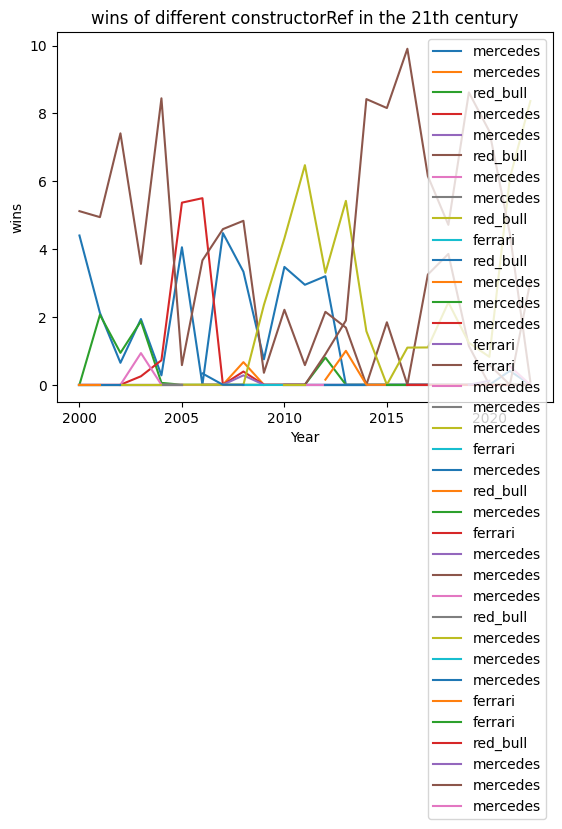

In [6]:
# Create a line plot of "sum wins" versus "year" with different lines for each "constructorId"

graph1=constructors_merged_21th.pivot_table(index=["year"],columns="constructorId",values="wins").reset_index()
list_columns = list(graph1.columns)
list_columns.remove("year")

for i in list_columns:
    plt.plot(graph1["year"],graph1[i])
    plt.xlabel("Year")
    plt.ylabel("wins")
    plt.legend(constructors_merged_21th['constructorRef'])
    plt.title("wins of different constructorRef in the 21th century")
# Set labels for x-axis and y-axis


In [7]:
plt.plot(constructors_merged_21th_topid["year"],constructors_merged_21th_topid["sum_wins"],label=constructors_merged_21th_topid["constructorId"])
plt.xlabel("Year")
plt.ylabel("wins")
plt.legend(constructors_merged_21th_topid['constructorId'].unique())

plt.title("highest wins in the 21th century")

# Display the plot
plt.show()

KeyError: 'year'

In [ ]:
#wins over the year by different constructors

In [ ]:
# switch the code for nationality 

